### Loading data from google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('Car.xlsx.csv')

In [3]:
row,col = df.shape
print(f'Rows : {row}')
print(f'Columns : {col}')

Rows : 8128
Columns : 13


In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [6]:
df['name'].nunique()

2058

In [7]:
df['brand'] = df['name'].apply(lambda x: x.lower().split(' ')[0])

In [8]:
df.isnull().sum()/len(df)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
brand            0.000000
dtype: float64

In [9]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
brand             object
dtype: object

In [10]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [11]:
df['mileage'] = df['mileage'].apply(lambda x: float(str(x).split(' ')[0]))

In [12]:
df['engine'] = df['engine'].apply(lambda x: float(str(x).split(' ')[0]))
df['engine'] = df['engine'].fillna(df['engine'].mean())

In [13]:
df['max_power']= df['max_power'].apply(lambda x : float(str(x).split(' ')[0]) if  str(x).split(' ')[0]!='' else np.nan)

In [14]:
missing_power = df[df['max_power'].isnull()]['name'].unique()

In [15]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [16]:
def convert2rpm(x):
  torq = ''
  rpm = ''
  if x != np.nan:
    x = str(x).lower().replace(',','')
    values = re.findall('[0-9.]+',x)
    if 'nm' in x:
      torq = float(values[0])
      try:
        rpm = float(values[1])
      except:
        rpm = 1000
    elif 'kgm' in x:
      torq = float(values[0])*9.81
      rpm = float(values[1])
  else:
    torq = np.nan
    rpm = np.nan
  return torq,rpm

convert2rpm('51@ 1,750-3,000(kgm@ rpm)')

(500.31, 1750.0)

In [17]:
for i in df.index:
  torq,rpm = convert2rpm(df.loc[i,'torque'])
  df.loc[i,'torque'] = torq
  df.loc[i,'rpm'] = rpm

In [18]:
df['torque'] = pd.to_numeric(df['torque'])

In [19]:
df['rpm'] = pd.to_numeric(df['rpm'])

In [20]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
brand             object
rpm              float64
dtype: object

In [21]:
owner_mapping= {}
for i,j in enumerate(df['owner'].unique()):
  owner_mapping[j] = -1*(i+1)

In [22]:
owner_mapping['Second Owner']

-2

In [23]:
df['owner']  = df['owner'].apply(lambda x: owner_mapping[x])

In [24]:
corr = df.corr()

<AxesSubplot:>

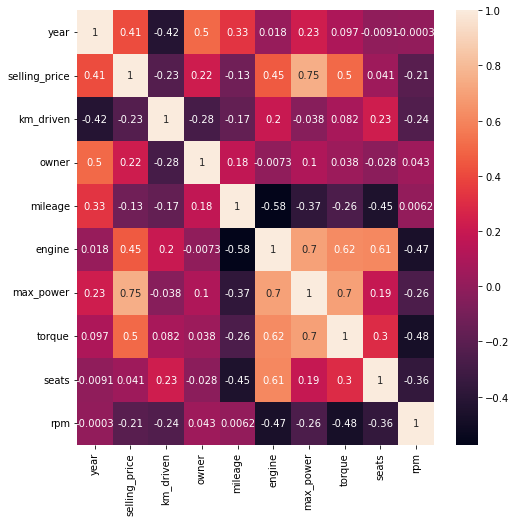

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [26]:
pd.get_dummies(df['fuel'],drop_first=True)

Diesel  LPG  Petrol
0          1    0       0
1          1    0       0
2          0    0       1
3          1    0       0
4          0    0       1
...      ...  ...     ...
8123       0    0       1
8124       1    0       0
8125       1    0       0
8126       1    0       0
8127       1    0       0

[8128 rows x 3 columns]

In [27]:
data = df.drop('name',axis=1)

In [28]:
data = pd.get_dummies(data)

In [29]:
for i in data.columns:
  data[i] = data[i].fillna(data[i].mean())

In [30]:
data.columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'rpm', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'brand_ambassador',
       'brand_ashok', 'brand_audi', 'brand_bmw', 'brand_chevrolet',
       'brand_daewoo', 'brand_datsun', 'brand_fiat', 'brand_force',
       'brand_ford', 'brand_honda', 'brand_hyundai', 'brand_isuzu',
       'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land', 'brand_lexus',
       'brand_mahindra', 'brand_maruti', 'brand_mercedes-benz', 'brand_mg',
       'brand_mitsubishi', 'brand_nissan', 'brand_opel', 'brand_peugeot',
       'brand_renault', 'brand_skoda', 'brand_tata', 'brand_toyota',
       'brand_volkswagen', 'brand_volvo'],
      dtype='object')

In [31]:
x = data.drop('selling_price',axis=1)
y = data.selling_price

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.1,random_state=1)

In [34]:
model = LinearRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test,test_pred))
r2_test= r2_score(y_test,test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 323901.3942777957
R2 : 0.8450071442174766
Test Performance
RMSE : 245453.24959027357
R2 : 0.8508749516268443


C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

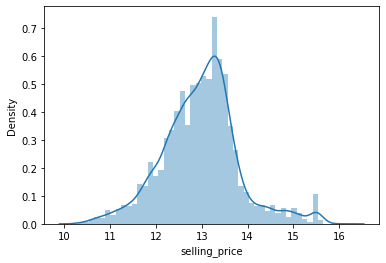

In [35]:
sns.distplot(y.apply(np.log))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'owner'),
  Text(3, 0, 'mileage'),
  Text(4, 0, 'engine'),
  Text(5, 0, 'max_power'),
  Text(6, 0, 'torque'),
  Text(7, 0, 'seats'),
  Text(8, 0, 'rpm'),
  Text(9, 0, 'fuel_CNG'),
  Text(10, 0, 'fuel_Diesel'),
  Text(11, 0, 'fuel_LPG'),
  Text(12, 0, 'fuel_Petrol'),
  Text(13, 0, 'seller_type_Dealer'),
  Text(14, 0, 'seller_type_Individual'),
  Text(15, 0, 'seller_type_Trustmark Dealer'),
  Text(16, 0, 'transmission_Automatic'),
  Text(17, 0, 'transmission_Manual'),
  Text(18, 0, 'brand_ambassador'),
  Text(19, 0, 'brand_ashok'),
  Text(20, 0, 'brand_audi'),
  Text(21, 0, 'brand_bmw'),
  Text(22, 0, 'brand_chevrolet'),
  Text(23, 0, 'brand_daewoo'),
  Text(24, 0, 'brand_datsun'),
  Text(25, 0, 'brand_fi

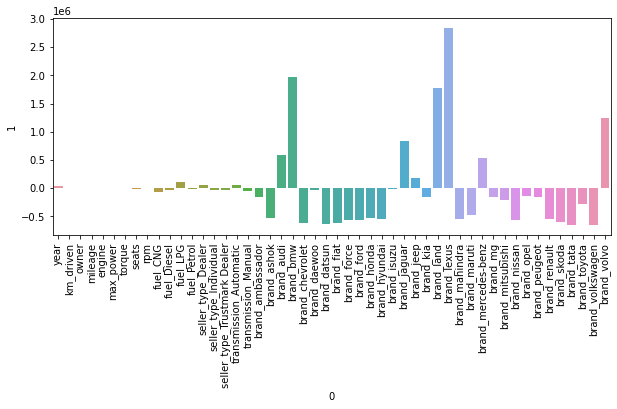

In [36]:
temp = pd.DataFrame(zip(x_train.columns,model.coef_))
plt.figure(figsize=(10,4))
sns.barplot(x=0,y=1,data=temp)
plt.xticks(rotation=90)

In [37]:
model = LinearRegression()
model.fit(x_train,y_train.apply(np.log))
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
rmse_train = np.sqrt(mean_squared_error(y_train.apply(np.log),train_pred))
r2_train = r2_score(y_train.apply(np.log),train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test.apply(np.log),test_pred))
r2_test= r2_score(y_test.apply(np.log),test_pred)
print('Train Performance')
print(f'RMSE : {rmse_train}')
print(f'R2 : {r2_train}')
print('Test Performance')
print(f'RMSE : {rmse_test}')
print(f'R2 : {r2_test}')

Train Performance
RMSE : 0.25580364188222016
R2 : 0.9081527016494779
Test Performance
RMSE : 0.25484320969679347
R2 : 0.8964730048490809


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'owner'),
  Text(3, 0, 'mileage'),
  Text(4, 0, 'engine'),
  Text(5, 0, 'max_power'),
  Text(6, 0, 'torque'),
  Text(7, 0, 'seats'),
  Text(8, 0, 'rpm'),
  Text(9, 0, 'fuel_CNG'),
  Text(10, 0, 'fuel_Diesel'),
  Text(11, 0, 'fuel_LPG'),
  Text(12, 0, 'fuel_Petrol'),
  Text(13, 0, 'seller_type_Dealer'),
  Text(14, 0, 'seller_type_Individual'),
  Text(15, 0, 'seller_type_Trustmark Dealer'),
  Text(16, 0, 'transmission_Automatic'),
  Text(17, 0, 'transmission_Manual'),
  Text(18, 0, 'brand_ambassador'),
  Text(19, 0, 'brand_ashok'),
  Text(20, 0, 'brand_audi'),
  Text(21, 0, 'brand_bmw'),
  Text(22, 0, 'brand_chevrolet'),
  Text(23, 0, 'brand_daewoo'),
  Text(24, 0, 'brand_datsun'),
  Text(25, 0, 'brand_fi

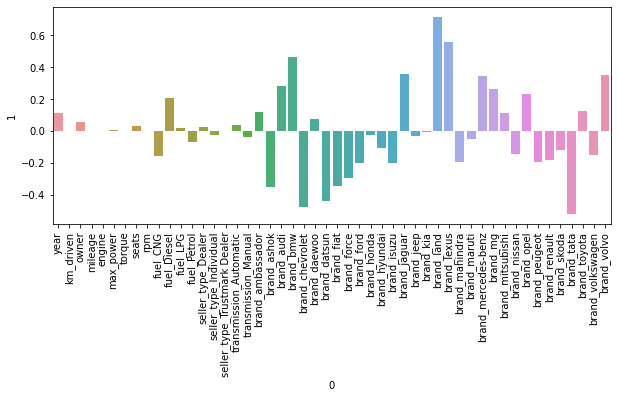

In [38]:
temp = pd.DataFrame(zip(x_train.columns,model.coef_))
plt.figure(figsize=(10,4))
sns.barplot(x=0,y=1,data=temp)
plt.xticks(rotation=90)

In [39]:
residuel = y_train.apply(np.log) - train_pred

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

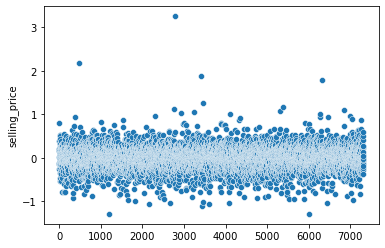

In [40]:
sns.scatterplot(range(len(y_train)),residuel)

In [41]:
temp =pd.DataFrame(zip(y_test,test_pred),columns = ['test','pred'])

In [42]:
temp['actual_pred'] = temp['pred'].apply(np.exp)

<AxesSubplot:xlabel='test', ylabel='actual_pred'>

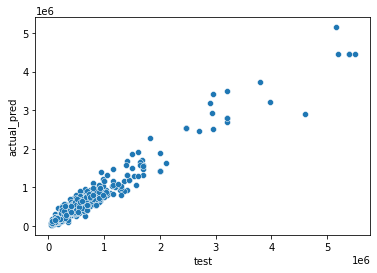

In [43]:
sns.scatterplot(x='test',y='actual_pred',data=temp)

In [44]:
np.sqrt(mean_squared_error(temp['test'],temp['actual_pred']))

160811.51431287208

In [45]:
x_train.shape

(7315, 50)

In [46]:
## Coarse feature selection
rfe = RFE(LinearRegression(),n_features_to_select=30)
rfe.fit(x_train,y_train.apply(np.log))

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [47]:
rfe.get_feature_names_out()

array(['year', 'seats', 'fuel_CNG', 'fuel_Diesel',
       'transmission_Automatic', 'transmission_Manual',
       'brand_ambassador', 'brand_ashok', 'brand_audi', 'brand_bmw',
       'brand_chevrolet', 'brand_datsun', 'brand_fiat', 'brand_force',
       'brand_honda', 'brand_isuzu', 'brand_jaguar', 'brand_jeep',
       'brand_kia', 'brand_land', 'brand_lexus', 'brand_mercedes-benz',
       'brand_mg', 'brand_mitsubishi', 'brand_opel', 'brand_renault',
       'brand_skoda', 'brand_tata', 'brand_toyota', 'brand_volvo'],
      dtype=object)

In [48]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
x_train_sm  = sm.add_constant(x_train)

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1562.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:46:52   Log-Likelihood:                -406.67
No. Observations:                7315   AIC:                             907.3
Df Residuals:                    7268   BIC:                             1232.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -105.2173      1.015   -103.671      0.000    -107.207    -103.228
year                             0.1164      0.001    108.511      0.000       0.114       0.119
km_driven                    -3.689e-07   6.22e-08     -5.927      0.000   -4.91e-07   -2.47e-07
owner                            0.0546      0.005     11.171      0.000       0.045       0.064
mileage                         -0.0016      0.001     -1.179      0.238      -0.004       0.001
engine                           0.0002   1.57e-05     11.067      0.000       0.000       0.000
max_power                        0.0084      0.000     43.436      0.000       0.008       0.009
torque                          -0.0001   4.72e-05     -2.589      0.010      -0.000   -2.97e-05
seats                            0.0317      0.005      6.097      0.000       0.022       0.042
rpm                           8.499e-06   6.16e-06      1.380      0.168   -3.57e-06    2.06e-05
fuel_CNG                       -26.4625      0.256   -103.364      0.000     -26.964     -25.961
fuel_Diesel                    -26.0980      0.254   -102.552      0.000     -26.597     -25.599
fuel_LPG                       -26.2863      0.256   -102.810      0.000     -26.787     -25.785
fuel_Petrol                    -26.3705      0.254   -103.750      0.000     -26.869     -25.872
seller_type_Dealer             -35.0484      0.338   -103.593      0.000     -35.712     -34.385
seller_type_Individual         -35.0946      0.338   -103.905      0.000     -35.757     -34.432
seller_type_Trustmark Dealer   -35.0744      0.339   -103.378      0.000     -35.739     -34.409
transmission_Automatic         -52.5724      0.508   -103.451      0.000     -53.569     -51.576
transmission_Manual            -52.6449      0.507   -103.876      0.000     -53.638     -51.651
brand_ambassador                -3.1665      0.130    -24.438      0.000      -3.420      -2.912
brand_ashok                     -3.6360      0.252    -14.427      0.000      -4.130      -3.142
brand_audi                      -3.0024      0.056    -53.746      0.000      -3.112      -2.893
brand_bmw                       -2.8234      0.045    -62.620      0.000      -2.912      -2.735
brand_chevrolet                 -3.7662      0.041    -91.378      0.000      -3.847      -3.685
brand_daewoo                    -3.2112      0.178    -18.025      0.000      -3.560      -2.862
brand_datsun                    -3.7276      0.051    -72.703      0.000      -3.828      -3.627
brand_fiat                      -3.6336      0.053    -68.493      0.000      -3.738      -3.530
brand_force                     -3.5810      0.110    -32.608      0.000      -3.796      -3.366
brand_ford                      -3.4852      0.040    -86.710      0.000    

In [51]:
flag = 1
while flag == 1:
  vif = pd.DataFrame()
  vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
  vif['variable'] = x_train.columns
  vif = vif.sort_values('VIF',ascending=False)
  vif = vif.reset_index(drop=True)
  vif_value = vif.loc[0,'VIF']
  if vif_value >=5:
    var = vif['variable'][0]
    x_train = x_train.drop(var,axis=1)
    print(f'Dropping f{var} as vif = {vif_value}')
  else:
    flag=2


C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping fbrand_fiat as vif = inf
Dropping fseller_type_Trustmark Dealer as vif = inf
Dropping ftransmission_Manual as vif = inf
Dropping ffuel_Diesel as vif = 277008.3211164523
Dropping fyear as vif = 494.327239858908
Dropping fseats as vif = 72.6654366033536
Dropping fengine as vif = 48.62185568282026
Dropping fmileage as vif = 37.26164600278319
Dropping frpm as vif = 32.53067690541973
Dropping fseller_type_Individual as vif = 29.125293342243765
Dropping fmax_power as vif = 27.11817184448786
Dropping ftorque as vif = 7.177550115120073
Dropping fowner as vif = 5.6647524269331955


In [52]:
x_train_sm = sm.add_constant(x_train)

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     267.3
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:47:25   Log-Likelihood:                -6000.4
No. Observations:                7315   AIC:                         1.208e+04
Df Residuals:                    7277   BIC:                         1.234e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12.8827      0.085    151.791      0.000      12.716      13.049
km_driven               -3.63e-06   1.21e-07    -29.922      0.000   -3.87e-06   -3.39e-06
fuel_CNG                  -0.4339      0.079     -5.478      0.000      -0.589      -0.279
fuel_LPG                  -0.8177      0.100     -8.192      0.000      -1.013      -0.622
fuel_Petrol               -0.5753      0.015    -37.434      0.000      -0.605      -0.545
seller_type_Dealer         0.2013      0.021      9.564      0.000       0.160       0.243
transmission_Automatic     0.5724      0.025     22.761      0.000       0.523       0.622
brand_ambassador          -0.9218      0.288     -3.200      0.001      -1.486      -0.357
brand_ashok                0.4548      0.558      0.816      0.415      -0.638       1.548
brand_audi                 1.3512      0.125     10.773      0.000       1.105       1.597
brand_bmw                  1.5673      0.103     15.282      0.000       1.366       1.768
brand_chevrolet           -0.0482      0.093     -0.520      0.603      -0.230       0.133
brand_daewoo              -0.9353      0.399     -2.346      0.019      -1.717      -0.154
brand_datsun               0.4177      0.110      3.784      0.000       0.201       0.634
brand_force                0.9269      0.240      3.858      0.000       0.456       1.398
brand_ford                 0.4084      0.089      4.591      0.000       0.234       0.583
brand_honda                0.7634      0.089      8.617      0.000       0.590       0.937
brand_hyundai              0.5093      0.086      5.942      0.000       0.341       0.677
brand_isuzu                1.0826      0.330      3.280      0.001       0.436       1.729
brand_jaguar               1.3432      0.111     12.062      0.000       1.125       1.562
brand_jeep                 1.7636      0.134     13.144      0.000       1.501       2.027
brand_kia                  0.7632      0.289      2.642      0.008       0.197       1.329
brand_land                 1.5312      0.242      6.332      0.000       1.057       2.005
brand_lexus                2.4460      0.131     18.632      0.000       2.189       2.703
brand_mahindra             0.6498      0.087      7.498      0.000       0.480       0.820
brand_maruti               0.3517      0.085      4.132      0.000       0.185       0.519
brand_mercedes-benz        1.3452      0.117     11.477      0.000       1.115       1.575
brand_mg                   1.3566      0.331      4.105      0.000       0.709       2.004
brand_mitsubishi           0.6927      0.175      3.970      0.000       0.351       1.035
brand_nissan               0.4428      0.106      4.178      0.000       0.235       0.651
brand_opel                -0.7808      0.558     -1.401      0.161      -1.874  

In [54]:
results.pvalues.sort_values(ascending=False).index[0]

'brand_chevrolet'

In [55]:
flag =1
while flag ==1:
  model = sm.OLS(y_train.apply(np.log),x_train_sm)
  results = model.fit()
  pvalues = results.pvalues.sort_values(ascending=False)
  max_pval = pvalues[0]
  max_col  = pvalues.index[0]
  if max_pval > 0.05:
    x_train_sm = x_train_sm.drop(max_col,axis=1)
  else:
    flag=2

In [56]:
x_train_sm.columns

Index(['const', 'km_driven', 'fuel_CNG', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'transmission_Automatic', 'brand_ambassador',
       'brand_audi', 'brand_bmw', 'brand_daewoo', 'brand_datsun',
       'brand_force', 'brand_ford', 'brand_honda', 'brand_hyundai',
       'brand_isuzu', 'brand_jaguar', 'brand_jeep', 'brand_kia', 'brand_land',
       'brand_lexus', 'brand_mahindra', 'brand_maruti', 'brand_mercedes-benz',
       'brand_mg', 'brand_mitsubishi', 'brand_nissan', 'brand_peugeot',
       'brand_renault', 'brand_skoda', 'brand_tata', 'brand_toyota',
       'brand_volkswagen', 'brand_volvo'],
      dtype='object')

In [57]:
model = sm.OLS(y_train.apply(np.log),x_train_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     290.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:47:25   Log-Likelihood:                -6001.9
No. Observations:                7315   AIC:                         1.207e+04
Df Residuals:                    7280   BIC:                         1.232e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12.8422      0.037    342.644      0.000      12.769      12.916
km_driven              -3.629e-06   1.21e-07    -29.924      0.000   -3.87e-06   -3.39e-06
fuel_CNG                  -0.4343      0.079     -5.484      0.000      -0.590      -0.279
fuel_LPG                  -0.8187      0.100     -8.203      0.000      -1.014      -0.623
fuel_Petrol               -0.5761      0.015    -37.511      0.000      -0.606      -0.546
seller_type_Dealer         0.2013      0.021      9.563      0.000       0.160       0.243
transmission_Automatic     0.5725      0.025     22.766      0.000       0.523       0.622
brand_ambassador          -0.8814      0.278     -3.173      0.002      -1.426      -0.337
brand_audi                 1.3916      0.100     13.984      0.000       1.197       1.587
brand_bmw                  1.6077      0.069     23.450      0.000       1.473       1.742
brand_daewoo              -0.8942      0.391     -2.285      0.022      -1.661      -0.127
brand_datsun               0.4589      0.079      5.779      0.000       0.303       0.615
brand_force                0.9674      0.228      4.246      0.000       0.521       1.414
brand_ford                 0.4490      0.046      9.825      0.000       0.359       0.539
brand_honda                0.8044      0.045     18.046      0.000       0.717       0.892
brand_hyundai              0.5501      0.039     14.247      0.000       0.474       0.626
brand_isuzu                1.1229      0.321      3.497      0.000       0.493       1.752
brand_jaguar               1.3836      0.081     17.050      0.000       1.224       1.543
brand_jeep                 1.8043      0.110     16.358      0.000       1.588       2.021
brand_kia                  0.8036      0.279      2.884      0.004       0.257       1.350
brand_land                 1.5715      0.229      6.848      0.000       1.122       2.021
brand_lexus                2.4871      0.106     23.359      0.000       2.278       2.696
brand_mahindra             0.6903      0.041     16.709      0.000       0.609       0.771
brand_maruti               0.3926      0.037     10.534      0.000       0.320       0.466
brand_mercedes-benz        1.3858      0.089     15.592      0.000       1.212       1.560
brand_mg                   1.3977      0.321      4.348      0.000       0.768       2.028
brand_mitsubishi           0.7331      0.157      4.669      0.000       0.425       1.041
brand_nissan               0.4835      0.073      6.579      0.000       0.339       0.628
brand_peugeot             -1.4922      0.552     -2.703      0.007      -2.575      -0.410
brand_renault              0.5955      0.053     11.334      0.000       0.493       0.699
brand_skoda                0.4190      0.067      6.238      0.000       0.287  

In [58]:
np.exp(np.sqrt(results.mse_model))

12035.014252162226

In [59]:
x_train_sm.head()

const  km_driven  fuel_CNG  fuel_LPG  fuel_Petrol  seller_type_Dealer  \
1882    1.0      70000         0         0            1                   0   
2851    1.0      25000         0         0            1                   0   
3722    1.0      50000         0         0            0                   0   
1657    1.0      29000         0         0            1                   0   
3461    1.0      80000         0         0            1                   0   

      transmission_Automatic  brand_ambassador  brand_audi  brand_bmw  ...  \
1882                       0                 0           0          0  ...   
2851                       0                 0           0          0  ...   
3722                       0                 0           0          0  ...   
1657                       0                 0           0          0  ...   
3461                       1                 0           0          0  ...   

      brand_mg  brand_mitsubishi  brand_nissan  brand_peugeot  brand_renault  \
1882         0                 0             0              0              0   
2851         0                 0             0              0              0   
3722         0                 0             0              0              0   
1657         0                 0             0              0              0   
3461         0                 0             0              0              0   

      brand_skoda  brand_tata  brand_toyota  brand_volkswagen  brand_volvo  
1882            0           0             0                 0            0  
2851            0           0             0                 0            0  
3722            0           0             0                 0            0  
1657            0           0             0                 0            0  
3461            0           0             0                 0            0  

[5 rows x 35 columns]

In [60]:
train_pred = results.predict(x_train_sm)

In [61]:
x_test_sm = sm.add_constant(x_test)

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
x_test_sm = x_test_sm[x_train_sm.columns]

In [63]:
test_pred = results.predict(x_test_sm)

In [64]:
np.sqrt(mean_squared_error(y_test,test_pred.apply(np.exp)))

319854.4574642465

In [65]:
np.sqrt(mean_squared_error(y_train,train_pred.apply(np.exp)))

388612.94533791265

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

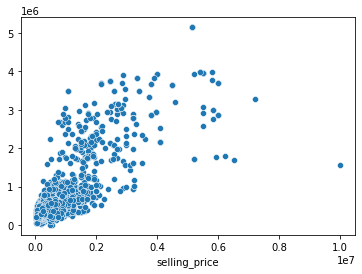

In [66]:
sns.scatterplot(y_train,train_pred.apply(np.exp))

C:\Users\SHIVAM AND ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

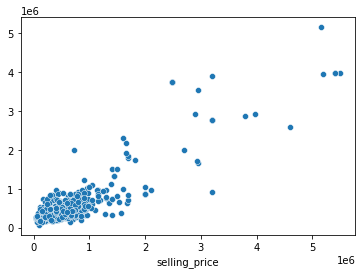

In [67]:
sns.scatterplot(y_test,test_pred.apply(np.exp))